### **1**

1. Defina dos listas de valores `x` e `y`, tal que los pares (x,y) cumplan una relación lineal del tipo $y = 2x + 1$. Defina la lista de valores de `x` con 100 puntos en el intervalo de valores que van desde -1 hasta 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

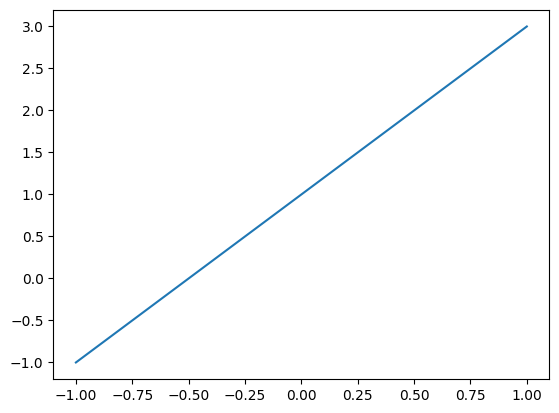

In [4]:
x = np.linspace(-1, 1, 100)
y = 2*x +1

plt.plot(x, y)

2. Grafique la curva generada por los valores (x,y) en color verde, con un ancho `linewidth = 3` y que sea una línea a trazos `linestyle = '--'`. Agregue al gráfico el título 'Relación Lineal'.

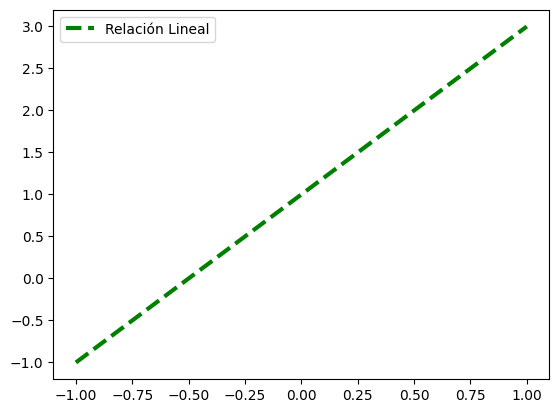

In [5]:
plt.plot(x, y, color='green', linewidth=3, linestyle='--', label='Relación Lineal')
plt.legend()
plt.show()

### **2**

Graficar tres subplots, con las curvas (x1,y1),(x2,y2) y (x3,y3), en una única figura. Apilar los subplots en forma vertical y de manera que compartan el eje x.

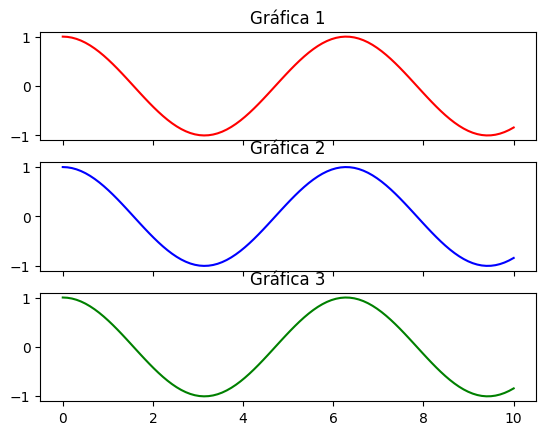

In [10]:
x1 = np.linspace(0, 10, 100)
y1 = np.cos(x1)

x2 = np.linspace(0, 10, 100)
y2 = np.cos(x2)

x3 = np.linspace(0, 10, 100)
y3 = np.cos(x3)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.plot(x1, y1, color='red')
ax1.set_title('Gráfica 1')

ax2.plot(x2, y2, color='blue')
ax2.set_title('Gráfica 2')

ax3.plot(x3, y3, color='green')
ax3.set_title('Gráfica 3')

plt.show()


### **3**
1. ¿Por qué cree que se forman esas líneas horizontales en el gráfico?
2. ¿Qué conclusiones pueden sacar sobre la relación de precio y puntaje observando este gráfico?
3. Tome solo los vinos realizados en Argentina (recuerde usar una máscara) y realice nuevamente un scatter plot de precio vs puntaje para estos vinos.

In [12]:
import pandas as pd
# Definimos las columnas que nos interesan
fields = ['country', 'points','price', 'variety']

# Cargamos el DataFrame solo con esas columnas
wine_reviews = pd.read_csv('wine_reviews.csv', usecols = fields)
wine_reviews.head()

,country,points,price,variety
0,Italy,87,NaN,White Blend
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir


In [13]:
# Tiramos las instancias que tienen un nan en alguno de los features.
wine_reviews.dropna(inplace=True)
wine_reviews.head()

,country,points,price,variety
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir
5,Spain,87,15.0,Tempranillo-Merlot


In [14]:
# Tomamos como coordenadas en x los precios
x = wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
y = wine_reviews.points.values

[Text(0.5, 0, 'Precio (usd)'),
 Text(0, 0.5, 'Puntaje'),
 Text(0.5, 1.0, 'Precio vs. puntaje en vinos'),
 (0.0, 500.0)]

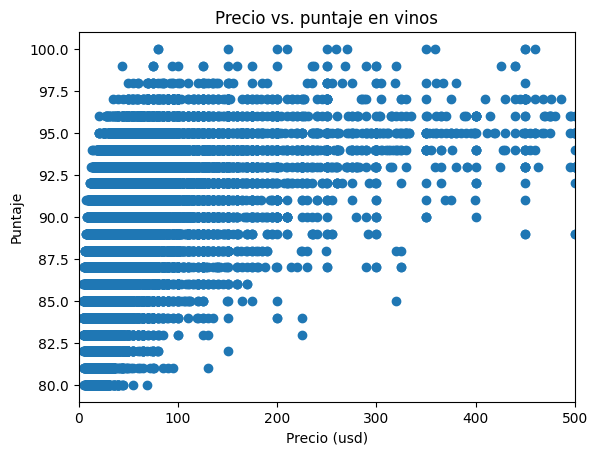

In [16]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos', xlim = (0,500))

Tome solo los vinos realizados en Argentina (recuerde usar una máscara) y realice nuevamente un scatter plot de precio vs puntaje para estos vinos.

In [17]:
precio_arg = wine_reviews[wine_reviews['country']=='Argentina'].price.values
puntos_arg = wine_reviews[wine_reviews['country']=='Argentina'].points.values

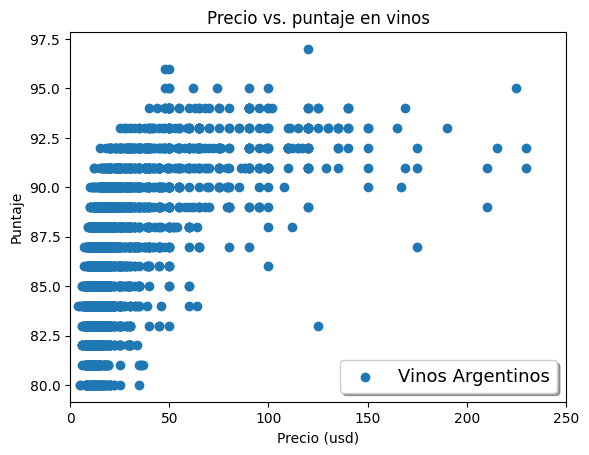

In [18]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(precio_arg, puntos_arg, label = 'Vinos Argentinos')
ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos', xlim = (0,250))

ax.legend(loc='lower right', shadow=True, fontsize=13)

### **4**

1. Repitan el histograma anterior, pero esta vez cambiando el número de `bins`. Por ejemplo, probar con 5, 50, 500 y 5000. ¿Cuál les parece la opción más adecuada? ¿De qué dependará el número de bins adecuado a seleccionar?

2. Prueben qué sucede si no le pasan el argumento `bins` a la función. Busquen en la bibliografía de la librería que es lo que hace por default la función.

**Nota**: la función `hist` además nos devuelve dos vectores relevantes. El vector `n` donde nos especifica el número de cuentas de cada bin (columna) del histograma. Y el vector `bins`, que nos dice los límites de estos bines (donde empieza y termina cada columna. Noten que el vector 'bins' tiene un largo igual a `len(n)+1`.

Como último ejemplo, vamos a graficar el histograma de precios correspondientes a los vinos argentinos con una calificación de 85 y los vamos a comparar al precio de los vinos argentinos con una calificación de 90.

In [19]:
mu = 20  # Media de la distribución
sigma = 4  # Desviación Estandar
valores = mu + sigma * np.random.randn(1000)



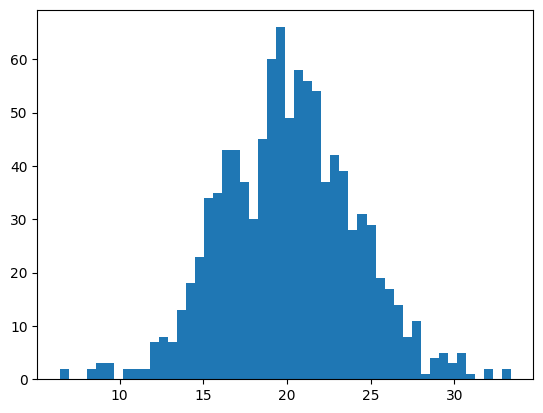

In [24]:
num_bins = 50

fig, ax = plt.subplots()

n, bins, _ = ax.hist(valores, bins = num_bins)

Graficar el histograma de precios correspondientes a los vinos argentinos con una calificación de 85 y los vamos a comparar al precio de los vinos argentinos con una calificación de 90.

(array([133.,  63.,  34.,   4.,   8.,   2.,   1.,   0.,   1.,   1.]),
 array([ 10. ,  25.7,  41.4,  57.1,  72.8,  88.5, 104.2, 119.9, 135.6,
        151.3, 167. ]),
 <BarContainer object of 10 artists>)

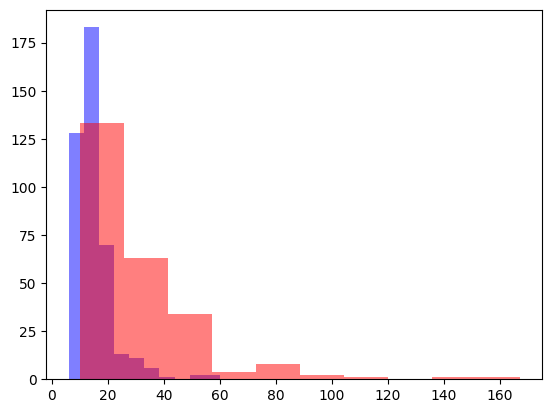

In [27]:
vinos_85 = wine_reviews[(wine_reviews['country'] == 'Argentina') & (wine_reviews['points'] == 85)]

vinos_90 = wine_reviews[(wine_reviews['country'] == 'Argentina') & (wine_reviews['points'] == 90)]


plt.hist(vinos_85['price'], bins=10, alpha=0.5, label='Calificación 85', color='blue')

plt.hist(vinos_90['price'], bins=10, alpha=0.5, label='Calificación 90', color='red')